## Setup


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pip install simpletransformers>=0.61.10

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [7]:
!pip install numpy==1.21
!pip install nlpaug==0.0.14
!pip install wget==3.2
!pip install matplotlib
!pip install requests==2.23.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 KB 9.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=a00263b2f27a94d4acb8db2776345a0c91e5fbea47e1592c47355460e2b5a182
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.

In [8]:
import nlpaug
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action
import os
!git clone https://github.com/makcedward/nlpaug.git
os.environ["MODEL_DIR"] = 'nlpaug/model/'

Cloning into 'nlpaug'...
remote: Enumerating objects: 5828, done.
remote: Counting objects: 100% (1355/1355), done.
remote: Compressing objects: 100% (443/443), done.
remote: Total 5828 (delta 965), reused 1247 (delta 902), pack-reused 4473
Receiving objects: 100% (5828/5828), 3.31 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (4127/4127), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/movies_clean.csv')
df.fillna('', inplace=True)
title_list = df['title'].tolist()


In [4]:
if "Knock at the Cabin" in title_list[:300]:
  print(1)

1


In [5]:
len(title_list)
with open("titlelist.txt", "w") as file:
  for title in title_list[:300]:
    file.write(title+'\n')

In [10]:
# Downloading the required txt file
import wget

if not os.path.exists("spelling_en.txt"):
    wget.download("https://raw.githubusercontent.com/makcedward/nlpaug/5238e0be734841b69651d2043df535d78a8cc594/nlpaug/res/word/spelling/spelling_en.txt")
else:
    print("File already exists")

In [11]:
origin_list = [] #y
expanded_list = [] #x

for x in title_list[:300]:
    
    k = nac.KeyboardAug().augment(x, n=300)

    rci = nac.RandomCharAug(action="insert").augment(x,n=300)

    rcs = nac.RandomCharAug(action="substitute").augment(x,  n=300)
    
    rcsw = nac.RandomCharAug(action="swap").augment(x, n=300)

    rcd = nac.RandomCharAug(action="delete").augment(x, n=300)

    ns = naw.SpellingAug('spelling_en.txt').augment(x,  n=300)

    s_list = x.split()

    # Create a list of all possible positions to add a space
    space_positions = list(range(1, len(s_list)))

    # Generate 4 random combinations of spaces
    combinations = []
    if len(s_list) > 1:
        for i in range(300):
            random_space_positions = random.sample(space_positions, random.randint(1, len(space_positions)))
            combination = ''
            for j, word in enumerate(s_list):
                if j in random_space_positions:
                    combination += ' '
                combination += word
            combinations.append(combination)
    else:
        # If there's only one word, just return it as is
        combinations.append(x)

    lst = []
    lst.extend(k)
    lst.extend(rci)
    lst.extend(rcs)
    lst.extend(rcsw)
    lst.extend(rcd)
    lst.extend(ns)


    expanded_list.extend(lst)

    origin_list.extend([x]*len(lst))


In [12]:
import random

# example training data and labels
#training_data = [1, 2, 3, 4, 5]
#labels = ['a', 'b', 'c', 'd', 'e']

# combine the training data and labels into a list of tuples
combined = list(zip(expanded_list, origin_list))

# shuffle the list of tuples
shuffled = random.sample(combined, len(combined))

# separate the shuffled training data and labels into separate lists
expanded_list, origin_list = zip(*shuffled)

# print the shuffled training data and labels


## Genrate the data


In [13]:
# Define the input and target texts
input_texts = expanded_list #x
target_texts = origin_list #y

# Open the file for writing
with open("output2.txt", "w") as file:
    # Write each pair of input and target texts to the file
    for input_text, target_text in zip(input_texts, target_texts):
        # Combine the input and target texts with tabs and newlines
        line = f"{input_text}\t{target_text}\n"
        # Write the line to the file
        file.write(line)

In [15]:
len(target_texts)

294879

## Configuration


In [3]:
batch_size = 128  # Batch size for training.
epochs = 40  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 600000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'drive/MyDrive/output2.txt'
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text = line.split("\t")
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = "\t" + target_text + "\n"
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

Number of samples: 294879
Number of unique input tokens: 96
Number of unique output tokens: 71
Max sequence length for inputs: 72
Max sequence length for outputs: 65


## Prepare the data


In [4]:
# Vectorize the data.


for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0


## Build the model


In [ ]:
# Define an input sequence and process it.
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


## Train the model


In [ ]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
)
# Save model
model.save("s2s")


Epoch 1/40
1843/1843 [==============================] - 39s 17ms/step - loss: 0.6504 - accuracy: 0.8281 - val_loss: 0.2279 - val_accuracy: 0.9363
Epoch 2/40
1843/1843 [==============================] - 26s 14ms/step - loss: 0.1276 - accuracy: 0.9629 - val_loss: 0.1240 - val_accuracy: 0.9637
Epoch 3/40
1843/1843 [==============================] - 26s 14ms/step - loss: 0.0932 - accuracy: 0.9701 - val_loss: 0.0944 - val_accuracy: 0.9671
Epoch 4/40
1843/1843 [==============================] - 26s 14ms/step - loss: 0.0817 - accuracy: 0.9733 - val_loss: 0.0859 - val_accuracy: 0.9727
Epoch 5/40
1843/1843 [==============================] - 26s 14ms/step - loss: 0.0677 - accuracy: 0.9775 - val_loss: 0.0603 - val_accuracy: 0.9801
Epoch 6/40
1843/1843 [==============================] - 26s 14ms/step - loss: 0.0430 - accuracy: 0.9858 - val_loss: 0.0459 - val_accuracy: 0.9854
Epoch 7/40
1843/1843 [==============================] - 26s 14ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0273 -

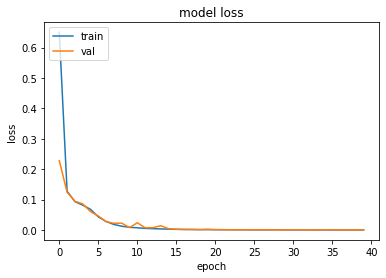

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

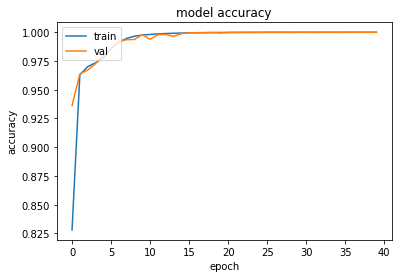

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!cp -r s2s '/content/drive/MyDrive'

In [4]:
model = keras.models.load_model("drive/MyDrive/s2s")

## Run inference (sampling)

1. encode input and retrieve initial decoder state
2. run one step of decoder with this initial state
and a "start of sequence" token as target.
Output will be the next target token.
3. Repeat with the current target token and current states


In [5]:
# Define sampling models
# Restore the model and construct the encoder and decoder.


encoder_inputs = model.input[0]  # input_1
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
encoder_states = [state_h_enc, state_c_enc]
encoder_model = keras.Model(encoder_inputs, encoder_states, name='encoder_model')

decoder_inputs = model.input[1]  # input_2
decoder_state_input_h = keras.Input(shape=(latent_dim,), name='decoder_state_input_h')
decoder_state_input_c = keras.Input(shape=(latent_dim,), name='decoder_state_input_c')
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states, name='decoder_model'
)


# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq, verbose = 0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose = 0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence



You can now generate decoded sentences as such:


In [18]:
def encode_sequence(input_text):
    encoder_input_matrix = np.zeros((max_encoder_seq_length, num_encoder_tokens), dtype="float32")
    for t, char in enumerate(input_text):
        encoder_input_matrix[t, input_token_index[char]] = 1.0
    encoder_input_matrix[t + 1 :, input_token_index[" "]] = 1.0
    encoder_input_matrix = encoder_input_matrix[np.newaxis, :, :]
    return encoder_input_matrix
    

In [19]:
#predict
input_seq = encode_sequence('knck at the cabn') 
decoded_sentence = decode_sequence(input_seq)
print(decoded_sentence)

Knock at the Cabin

